## Recognising Handwritten Digits on MNIST Datasets using KNN

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 1: Data Preparation

In [37]:
dfx = pd.read_csv('train.csv')

dfx.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:

data = dfx.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [39]:
X = data[:, 1:]
Y = data[:,0]
print(X.shape)
print(Y.shape)


(42000, 784)
(42000,)


In [40]:
split = int(0.8*X.shape[0])
print(split)

X_train = X[:split, :]
X_test = X[split:,  :]

Y_train = Y[:split]
Y_test = Y[split:]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

33600
(33600, 784) (33600,)
(8400, 784) (8400,)


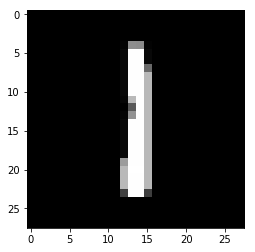

1


In [41]:
#Visualising Some Samples

def drawing(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap = 'gray')
    plt.show()

drawing(X_train[2])
print(Y_train[2])

### Step 2: KNN


In [42]:
def dist(x1, x2):
    return np.sqrt(sum((x1 - x2)**2))

def knn(X,Y,query_point, k = 5):
    
    vals = []
    
    m = X.shape[0]
    
    for i in range(m):
        d = dist(X[i], query_point)
        vals.append((d,Y[i]))
        
    vals = sorted(vals)
    
    #Nearest K points
    vals = vals[:k]
    
  
    vals = np.array(vals)
    
    #print(vals)
    new_vals = np.unique(vals[:,1], return_counts = True)
    
    #print(new_vals)
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

### Step 3: Make predictions

In [43]:
pred = knn(X_train, Y_train, X_test[5])

print(int(pred))

6


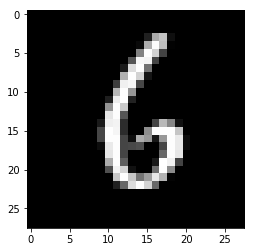

6


In [44]:
drawing(X_test[5])
print(Y_test[5])

In [46]:
#Accuracy
# Checking for first 100 points

cnt = 0;
for i in range(100):
    pred = knn(X_train, Y_train, X_test[i])
    if(int(pred) == Y_test[i]):
        cnt+=1
        
print(cnt/100)
    
    

0.96
